In [227]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 12,9
pd.set_option('display.max_columns', 20)

- Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

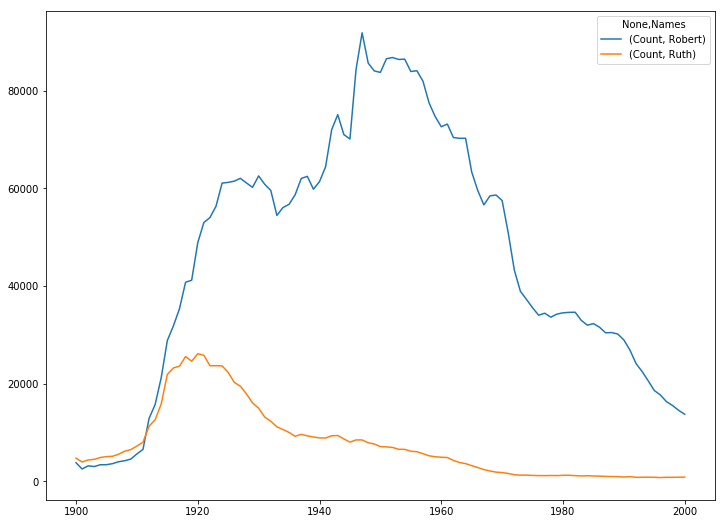

In [246]:
names_by_year = {}
for year in range(1880, 2018):
    names_by_year[year] = pd.read_csv(f'names/yob{year}.txt', names=['Names','Gender','Count'])

date_start = 1900
date_end = 2000

names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all = names_all.loc[(names_all.index >= date_start) & (names_all.index <= date_end)]
names_all = names_all[(names_all['Names'] == 'Ruth') | (names_all['Names'] == 'Robert')]
names_all = names_all.groupby([names_all.index, names_all['Names']]).sum()
names_all = names_all.unstack('Names')
names_all.plot()

- Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

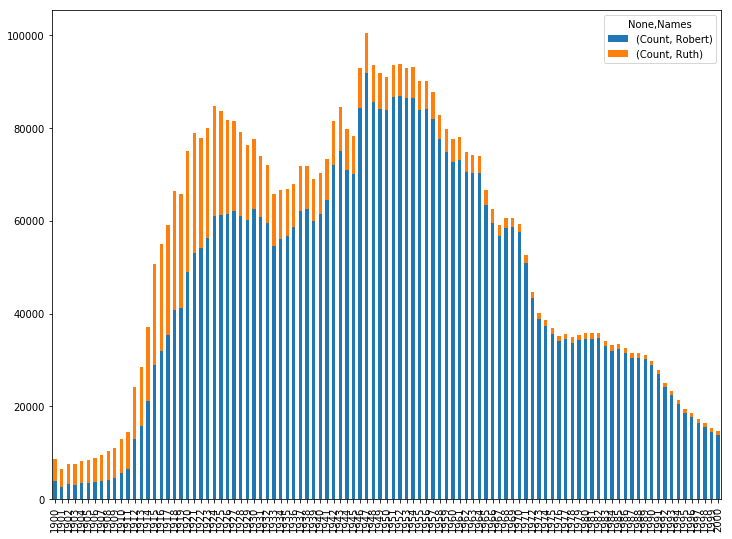

In [295]:
import numpy as np

x = np.arange(date_start, date_end, 5)

names_all_hist = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all_hist = names_all_hist.loc[(names_all_hist.index >= date_start) & (names_all_hist.index <= date_end)]
names_all_hist = names_all_hist[(names_all_hist['Names'] == 'Ruth') | (names_all_hist['Names'] == 'Robert')]
names_all_hist = names_all_hist.groupby([names_all_hist.index, names_all_hist['Names']]).sum().unstack()
names_all_hist.plot(kind='bar', stacked=True)